In [106]:
import pandas as pd
import missingno as msno
from numpy.core.multiarray import result_type
import numpy as np



In [107]:
# read tha data in many file and merge it in one dictionary
filemainpath = "/home/freitas/Downloads/internet2/data/"
keep = ['CNPJ','AN_EXERCICIO','IEX']
df = {}
for year in range(2015, 2020):
    filename = f'iex_inep_{year}.CSV'
    df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=',', encoding='latin1')
    df['iex_'+str(year)] = df['iex_'+str(year)][keep]
    df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
    df['iex'+str(year)] = df['iex_'+str(year)].dropna()
    df['iex'+str(year)] = df['iex'+str(year)].drop_duplicates()
    print({year},df['iex_'+str(year)].shape)
year = 2020    
filename = f'iex_inep_{year}.CSV'
df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=';', encoding='latin1')
df['iex_'+str(year)] = df['iex_'+str(year)][keep]
df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
print({year},df['iex_'+str(year)].shape)


{2015} (103781, 3)
{2016} (104795, 3)
{2017} (110910, 3)
{2018} (110910, 3)
{2019} (110910, 3)
{2020} (110910, 3)


In [108]:
print(df.keys())
# merge all dataframes in the dictionary into one dataframe
df = pd.concat(df.values(), ignore_index=True)


dict_keys(['iex_2015', 'iex2015', 'iex_2016', 'iex2016', 'iex_2017', 'iex2017', 'iex_2018', 'iex2018', 'iex_2019', 'iex2019', 'iex_2020'])


In [109]:
# read data
#df = pd.read_csv('/home/freitas/Downloads/internet2/data/IEx_2014_2020.csv',sep=';')
print(df.shape)
df.head()

(1193522, 3)


,CNPJ,ANO,IEX
0,49000144,2015,8.356554
1,304000159,2015,10.000000
2,16130000112,2015,10.000000
3,26034000155,2015,10.000000
4,28175000107,2015,10.000000


In [110]:
df.dtypes

CNPJ      int64
ANO       int64
IEX     float64
dtype: object

In [111]:
# remove characters from CNPJ
#df['CNPJ'] = df['CNPJ'].str.replace('.','')
#df['CNPJ'] = df['CNPJ'].str.replace(',','')

df.shape

(1193522, 3)

In [112]:
# convert CNPJ to float
#df['CNPJ'] = df['CNPJ'].astype(float)
#df['CNPJ'] = df['CNPJ'].astype(int)
df.describe()

,CNPJ,ANO,IEX
count,1.193522e+06,1.193522e+06,1.193522e+06
mean,1.554445e+13,2.018428e+03,6.619564e+00
std,2.199955e+13,2.164791e+00,6.980737e+01
min,4.900014e+07,2.015000e+03,0.000000e+00
25%,2.308516e+12,2.016000e+03,2.311548e+00
50%,7.488648e+12,2.020000e+03,6.990421e+00
75%,1.659629e+13,2.020000e+03,9.917812e+00
max,9.859586e+13,2.020000e+03,9.999000e+03


In [113]:
df.sort_values(by=['IEX'],ascending=False).head(20)

,CNPJ,ANO,IEX
136334,3162845000171,2015,9999.0
32553,3162845000171,2015,9999.0
1552,671880000128,2015,9998.0
184861,15904824000163,2015,9998.0
81080,15904824000163,2015,9998.0
105333,671880000128,2015,9998.0
828539,14066491000188,2020,9997.0
495809,14066491000188,2020,9997.0
717629,14066491000188,2020,9997.0
939449,14066491000188,2020,9997.0


In [114]:
#drop lines with iex < 0 and iex > 10
df.query('IEX >= 0 and IEX <= 10', inplace=True)
df.describe()


,CNPJ,ANO,IEX
count,1.193414e+06,1.193414e+06,1.193414e+06
mean,1.554466e+13,2.018428e+03,6.014645e+00
std,2.200006e+13,2.164774e+00,3.920124e+00
min,4.900014e+07,2.015000e+03,0.000000e+00
25%,2.308491e+12,2.016000e+03,2.309542e+00
50%,7.488642e+12,2.020000e+03,6.989884e+00
75%,1.659629e+13,2.020000e+03,9.917740e+00
max,9.859586e+13,2.020000e+03,1.000000e+01


In [115]:
escola = pd.read_csv('/home/freitas/Downloads/internet2/data/Chave_escolas_censo.csv')
escola = escola[['CO_ESCOLA','NU_CGC_ENTIDADE']]
escola.rename(columns={'NU_CGC_ENTIDADE':'CNPJ'},inplace=True)
escola.head()

,CO_ESCOLA,CNPJ
0,41144287,80619661000139
1,41145518,81883621000162
2,41353242,80612815000160
3,41359232,1794067000108
4,41361261,1572770000171


In [116]:
merge_iex_escola = pd.merge(df, escola, on='CNPJ', how='left')
merge_iex_escola

,CNPJ,ANO,IEX,CO_ESCOLA
0,49000144,2015,8.356554,35075577.0
1,304000159,2015,10.000000,35062807.0
2,16130000112,2015,10.000000,35074962.0
3,26034000155,2015,10.000000,35076090.0
4,28175000107,2015,10.000000,52096564.0
...,...,...,...,...
1199786,97551810000178,2020,0.000000,31224871.0
1199787,97552446000160,2020,9.958901,31349585.0
1199788,97552912000108,2020,2.506150,15096912.0
1199789,97553564000193,2020,9.945694,31220124.0


In [117]:
merge_iex_escola.isna().sum()
merge_iex_escola.dropna(inplace=True)
print(merge_iex_escola.shape)
merge_iex_escola.head()

(1148545, 4)


,CNPJ,ANO,IEX,CO_ESCOLA
0,49000144,2015,8.356554,35075577.0
1,304000159,2015,10.000000,35062807.0
2,16130000112,2015,10.000000,35074962.0
3,26034000155,2015,10.000000,35076090.0
4,28175000107,2015,10.000000,52096564.0


In [118]:
censo = pd.read_csv('/home/freitas/Downloads/internet2/data/censo_2014_2020.csv')
# rename columns CO_ENTIDADE to CO_ESCOLA
censo.rename(columns={'NU_ANO_CENSO':'ANO','CO_ENTIDADE':'CO_ESCOLA'},inplace=True)
censo.query('ANO > 2014', inplace=True)
print(censo.shape)
censo.head()

(858576, 28)


,ANO,SG_UF,CO_ESCOLA,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,IN_PREDIO_COMPARTILHADO,IN_AGUA_REDE_PUBLICA,...,IN_QUADRA_ESPORTES,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA
149743,2015,RO,11022558,1100015,1,2,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149744,2015,RO,11024275,1100015,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
149745,2015,RO,11024291,1100015,1,3,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149746,2015,RO,11024372,1100015,1,3,2,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
149747,2015,RO,11024593,1100015,1,3,2,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [119]:
merge_iex_censo = pd.merge(merge_iex_escola, censo, on=['ANO','CO_ESCOLA'])
print(merge_iex_censo.shape)
merge_iex_censo.head()

(1147401, 30)


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_QUADRA_ESPORTES,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA
0,49000144,2015,8.356554,35075577.0,SP,3550308,1,3,1,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,49000144,2015,8.356554,35075577.0,SP,3550308,1,3,1,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,304000159,2015,10.000000,35062807.0,SP,3550308,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,304000159,2015,10.000000,35062807.0,SP,3550308,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,16130000112,2015,10.000000,35074962.0,SP,3526902,1,3,1,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [120]:
merge_iex_censo.isna().sum()

CNPJ                               0
ANO                                0
IEX                                0
CO_ESCOLA                          0
SG_UF                              0
CO_MUNICIPIO                       0
TP_SITUACAO_FUNCIONAMENTO          0
TP_DEPENDENCIA                     0
TP_LOCALIZACAO                     0
IN_LOCAL_FUNC_GALPAO               0
IN_PREDIO_COMPARTILHADO        10270
IN_AGUA_REDE_PUBLICA               0
IN_ENERGIA_REDE_PUBLICA            0
IN_LIXO_SERVICO_COLETA             0
IN_ALMOXARIFADO                    0
IN_AUDITORIO                       0
IN_BIBLIOTECA                      0
IN_BIBLIOTECA_SALA_LEITURA         0
IN_LABORATORIO_CIENCIAS            0
IN_LABORATORIO_INFORMATICA         0
IN_QUADRA_ESPORTES                 0
IN_SALA_DIRETORIA                  0
IN_SECRETARIA                      0
IN_COMPUTADOR                      0
IN_EQUIP_COPIADORA                 0
IN_EQUIP_IMPRESSORA                0
IN_INTERNET                        0
I

In [121]:
banco = pd.read_csv('/home/freitas/Downloads/internet2/data/ag_demo_2014_2020.csv',sep=';',encoding='latin1')
banco.rename(columns={'ano':'ANO','CodMun':"CO_MUNICIPIO","POP.EST":"POP"},inplace=True)
banco = banco[['ANO','CO_MUNICIPIO','possui_agencia_BB','POP']]
banco.head()


,ANO,CO_MUNICIPIO,possui_agencia_BB,POP
1,2014,1100015,1,25652
2,2014,1100023,1,102860
3,2014,1100031,1,6424
4,2014,1100049,1,86556
5,2014,1100056,1,18013


In [122]:
merge_iex_censo_banco = pd.merge(merge_iex_censo, banco, on = ['ANO','CO_MUNICIPIO'], how='left')
print(merge_iex_censo_banco.shape)
merge_iex_censo_banco.head()

(1147401, 32)


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,49000144,2015,8.356554,35075577.0,SP,3550308,1,3,1,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,11967825
1,49000144,2015,8.356554,35075577.0,SP,3550308,1,3,1,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,11967825
2,304000159,2015,10.000000,35062807.0,SP,3550308,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,11967825
3,304000159,2015,10.000000,35062807.0,SP,3550308,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,11967825
4,16130000112,2015,10.000000,35074962.0,SP,3526902,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,296440


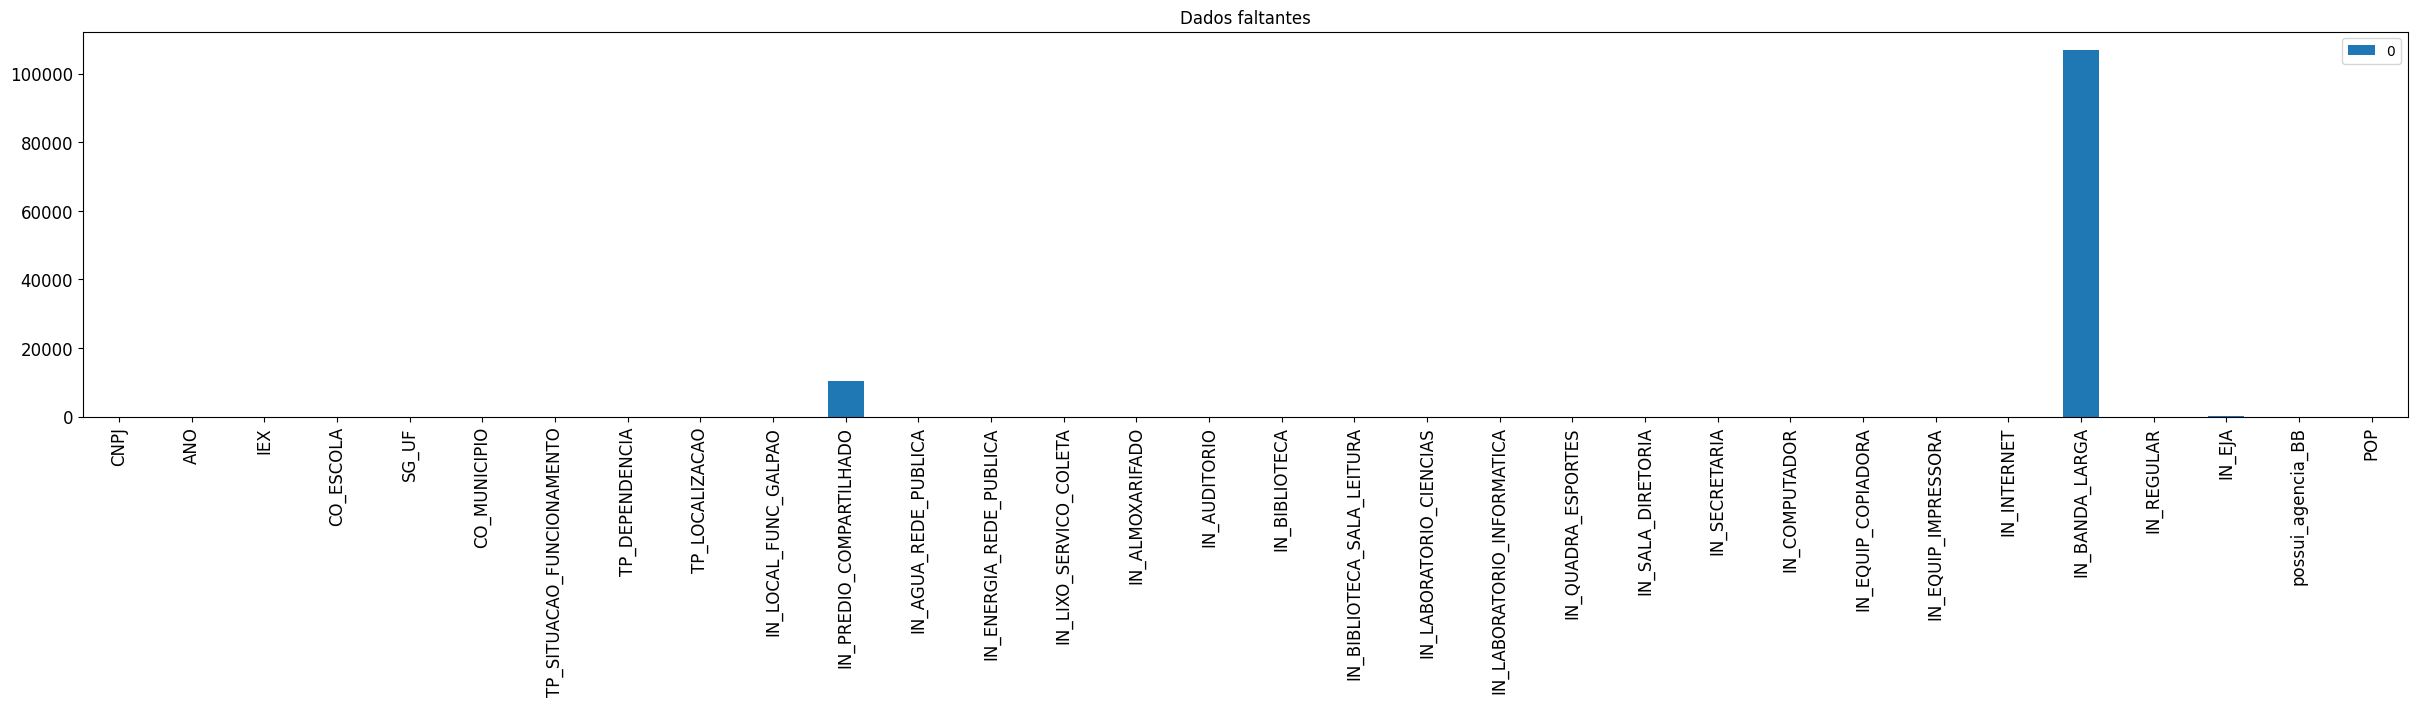

In [123]:
pd.DataFrame(merge_iex_censo_banco.isnull().sum()).plot(kind='bar',title='Dados faltantes',fontsize=12,figsize=(30,5));

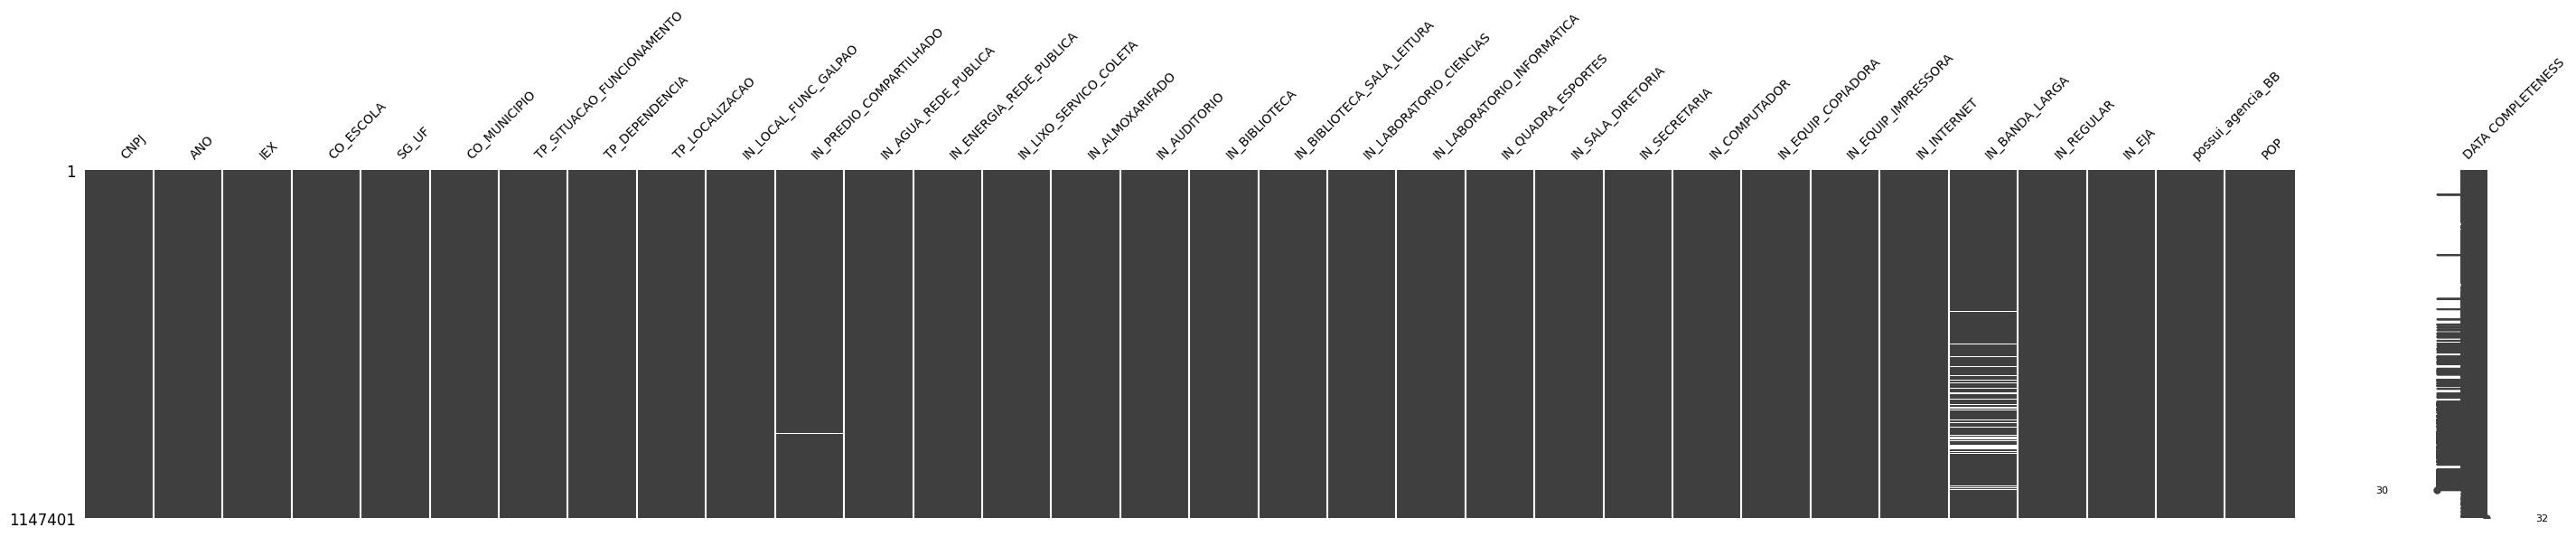

In [124]:
msno.matrix(merge_iex_censo_banco,labels=True,fontsize=10,figsize=(35,5));

In [125]:
type(merge_iex_censo_banco.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147401 entries, 0 to 1147400
Data columns (total 32 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CNPJ                        1147401 non-null  int64  
 1   ANO                         1147401 non-null  int64  
 2   IEX                         1147401 non-null  float64
 3   CO_ESCOLA                   1147401 non-null  float64
 4   SG_UF                       1147401 non-null  object 
 5   CO_MUNICIPIO                1147401 non-null  int64  
 6   TP_SITUACAO_FUNCIONAMENTO   1147401 non-null  int64  
 7   TP_DEPENDENCIA              1147401 non-null  int64  
 8   TP_LOCALIZACAO              1147401 non-null  int64  
 9   IN_LOCAL_FUNC_GALPAO        1147401 non-null  float64
 10  IN_PREDIO_COMPARTILHADO     1137131 non-null  float64
 11  IN_AGUA_REDE_PUBLICA        1147401 non-null  float64
 12  IN_ENERGIA_REDE_PUBLICA     1147401 non-null  float64
 1

NoneType

In [126]:
merge_iex_censo_banco.isna().sum()[:20]

CNPJ                              0
ANO                               0
IEX                               0
CO_ESCOLA                         0
SG_UF                             0
CO_MUNICIPIO                      0
TP_SITUACAO_FUNCIONAMENTO         0
TP_DEPENDENCIA                    0
TP_LOCALIZACAO                    0
IN_LOCAL_FUNC_GALPAO              0
IN_PREDIO_COMPARTILHADO       10270
IN_AGUA_REDE_PUBLICA              0
IN_ENERGIA_REDE_PUBLICA           0
IN_LIXO_SERVICO_COLETA            0
IN_ALMOXARIFADO                   0
IN_AUDITORIO                      0
IN_BIBLIOTECA                     0
IN_BIBLIOTECA_SALA_LEITURA        0
IN_LABORATORIO_CIENCIAS           0
IN_LABORATORIO_INFORMATICA        0
dtype: int64

In [127]:
merge_iex_censo_banco.isna().sum()[20:40]

IN_QUADRA_ESPORTES          0
IN_SALA_DIRETORIA           0
IN_SECRETARIA               0
IN_COMPUTADOR               0
IN_EQUIP_COPIADORA          0
IN_EQUIP_IMPRESSORA         0
IN_INTERNET                 0
IN_BANDA_LARGA         106946
IN_REGULAR                  0
IN_EJA                     54
possui_agencia_BB           0
POP                         0
dtype: int64

In [131]:
merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].replace(np.nan,pd.NA)
merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].replace(np.nan,pd.NA)
merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].replace(np.nan,pd.NA)

In [132]:
varlist = merge_iex_censo_banco.columns[9:-2]
for var in varlist:
    merge_iex_censo_banco[var] = merge_iex_censo_banco[var].astype(int)

In [133]:
# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].replace(2,pd.NA)
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].replace(2,pd.NA)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].replace(2,pd.NA)
merge_iex_censo_banco.dtypes

CNPJ                            int64
ANO                             int64
IEX                           float64
CO_ESCOLA                     float64
SG_UF                          object
CO_MUNICIPIO                    int64
TP_SITUACAO_FUNCIONAMENTO       int64
TP_DEPENDENCIA                  int64
TP_LOCALIZACAO                  int64
IN_LOCAL_FUNC_GALPAO            int64
IN_PREDIO_COMPARTILHADO         int64
IN_AGUA_REDE_PUBLICA            int64
IN_ENERGIA_REDE_PUBLICA         int64
IN_LIXO_SERVICO_COLETA          int64
IN_ALMOXARIFADO                 int64
IN_AUDITORIO                    int64
IN_BIBLIOTECA                   int64
IN_BIBLIOTECA_SALA_LEITURA      int64
IN_LABORATORIO_CIENCIAS         int64
IN_LABORATORIO_INFORMATICA      int64
IN_QUADRA_ESPORTES              int64
IN_SALA_DIRETORIA               int64
IN_SECRETARIA                   int64
IN_COMPUTADOR                   int64
IN_EQUIP_COPIADORA              int64
IN_EQUIP_IMPRESSORA             int64
IN_INTERNET 

In [134]:
merge_iex_censo_banco.head()

,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,49000144,2015,8.356554,35075577.0,SP,3550308,1,3,1,0,...,1,1,0,0,1,1,1,0,1,11967825
1,49000144,2015,8.356554,35075577.0,SP,3550308,1,3,1,0,...,1,1,0,0,1,1,1,0,1,11967825
2,304000159,2015,10.000000,35062807.0,SP,3550308,1,3,1,0,...,1,1,1,1,1,1,1,0,1,11967825
3,304000159,2015,10.000000,35062807.0,SP,3550308,1,3,1,0,...,1,1,1,1,1,1,1,0,1,11967825
4,16130000112,2015,10.000000,35074962.0,SP,3526902,1,3,1,0,...,1,1,1,1,1,1,1,0,1,296440


In [135]:
merge_iex_censo_banco.to_csv('/home/freitas/Downloads/internet2/data/merge_iex_censo_banco.csv')